In [ ]:
from transformers import BertModel, BertTokenizer
from sklearn.cluster import KMeans
import torch
import numpy as np
import pandas as pd
import pickle

# Load data from Excel file
file_path = 'data_ready_with_kategori.xlsx'
data = pd.read_excel(file_path)


In [ ]:
# Load embeddings from the pickle file (optional, for verification)
nmfile = 'text_berita_embeddings.pkl'
with open(nmfile, 'rb') as file:
    embeddings = pickle.load(file)
print("Embeddings berhasil dimuat dari file pickle.")

Embeddings berhasil dimuat dari file pickle.


In [ ]:

# Filter data to use the `text_berita` column for clustering
filtered_data = data[['text_berita']].dropna()

In [ ]:
num_clusters = 5

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

# Fungsi evaluasi clustering
def evaluate_clustering(embeddings, labels):
    silhouette = silhouette_score(embeddings, labels)
    calinski_harabasz = calinski_harabasz_score(embeddings, labels)
    davies_bouldin = davies_bouldin_score(embeddings, labels)
    return silhouette, calinski_harabasz, davies_bouldin

# TF-IDF Clustering
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Bisa disesuaikan
tfidf_embeddings = tfidf_vectorizer.fit_transform(filtered_data['text_berita']).toarray()

kmeans_tfidf = KMeans(n_clusters=num_clusters, random_state=42)
labels_tfidf = kmeans_tfidf.fit_predict(tfidf_embeddings)

tfidf_scores = evaluate_clustering(tfidf_embeddings, labels_tfidf)
print("TF-IDF Clustering Performance:")
print(f"Silhouette Score: {tfidf_scores[0]:.4f}")
print(f"Calinski-Harabasz Score: {tfidf_scores[1]:.4f}")
print(f"Davies-Bouldin Score: {tfidf_scores[2]:.4f}")

# Bag of Words Clustering
bow_vectorizer = CountVectorizer(max_features=1000)  # Bisa disesuaikan
bow_embeddings = bow_vectorizer.fit_transform(filtered_data['text_berita']).toarray()

kmeans_bow = KMeans(n_clusters=num_clusters, random_state=42)
labels_bow = kmeans_bow.fit_predict(bow_embeddings)

bow_scores = evaluate_clustering(bow_embeddings, labels_bow)
print("\nBag of Words Clustering Performance:")
print(f"Silhouette Score: {bow_scores[0]:.4f}")
print(f"Calinski-Harabasz Score: {bow_scores[1]:.4f}")
print(f"Davies-Bouldin Score: {bow_scores[2]:.4f}")

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity

# Cosine Similarity Clustering
cosine_sim_matrix = cosine_similarity(embeddings)
cosine_distance_matrix = 1 - cosine_sim_matrix  # Jarak 1 - Similarity

# Clustering menggunakan AgglomerativeClustering dengan parameter yang benar
agglomerative_clustering = AgglomerativeClustering(n_clusters=num_clusters, metric='precomputed', linkage='average')
labels_cosine = agglomerative_clustering.fit_predict(cosine_distance_matrix)

cosine_scores = evaluate_clustering(embeddings, labels_cosine)
print("\nCosine Similarity Clustering Performance:")
print(f"Silhouette Score: {cosine_scores[0]:.4f}")
print(f"Calinski-Harabasz Score: {cosine_scores[1]:.4f}")
print(f"Davies-Bouldin Score: {cosine_scores[2]:.4f}")



TF-IDF Clustering Performance:
Silhouette Score: 0.0381
Calinski-Harabasz Score: 157.5365
Davies-Bouldin Score: 4.6409

Bag of Words Clustering Performance:
Silhouette Score: 0.1341
Calinski-Harabasz Score: 437.3889
Davies-Bouldin Score: 2.1185

Cosine Similarity Clustering Performance:
Silhouette Score: 0.3265
Calinski-Harabasz Score: 106.0054
Davies-Bouldin Score: 0.9017


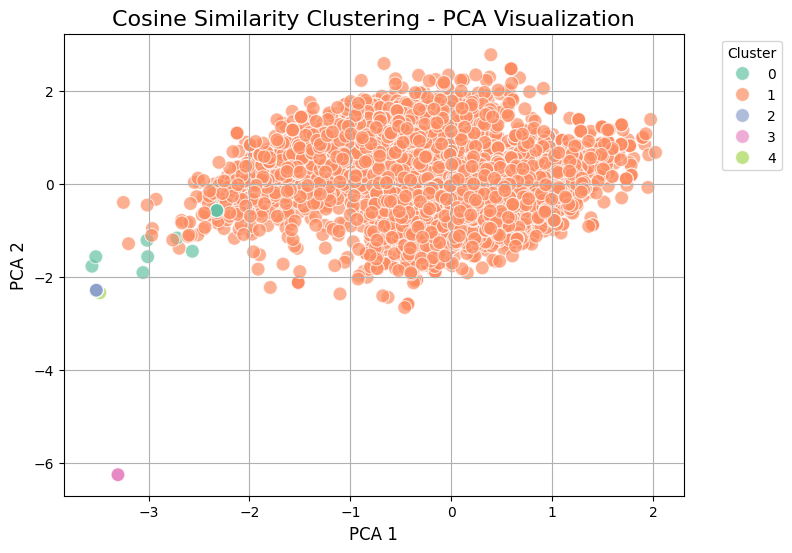

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Reduksi dimensi menggunakan PCA (2D)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualisasi hasil clustering dengan PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=labels_cosine, palette="Set2", s=100, alpha=0.7)

plt.title('Cosine Similarity Clustering - PCA Visualization', fontsize=16)
plt.xlabel('PCA 1', fontsize=12)
plt.ylabel('PCA 2', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
